In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = "http://books.toscrape.com/catalogue/page-{}.html"
titles = []
prices = []
ratings = []
availability = []

for page in range(1, 6):  # scrape first 5 pages
    res = requests.get(base_url.format(page))
    soup = BeautifulSoup(res.text, 'html.parser')
    books = soup.find_all("article", class_="product_pod")

    for book in books:
        titles.append(book.h3.a["title"])
        prices.append(book.find("p", class_="price_color").text[1:])  # remove £
        ratings.append(book.p.get("class")[1])  # class includes 'star-rating'
        availability.append(book.find("p", class_="instock availability").text.strip())

df = pd.DataFrame({
    "Title": titles,
    "Price": prices,
    "Rating": ratings,
    "Availability": availability
})
# Remove non-numeric values and strip spaces
df["Price"] = df["Price"].str.replace('£', '', regex=False).str.strip()

# Filter out rows where price is not a number
df = df[df["Price"].str.replace('.', '', 1).str.isnumeric()]

# Now convert to float
df["Price"] = df["Price"].astype(float)

df.head()


,Title,Price,Rating,Availability
0,A Light in the Attic,51.77,Three,In stock
1,Tipping the Velvet,53.74,One,In stock
2,Soumission,50.10,One,In stock
3,Sharp Objects,47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock


In [27]:
import sqlite3

conn = sqlite3.connect("books.db")
df.to_sql("books_data", conn, if_exists="replace", index=False)


100

In [28]:
# Run SQL queries
query1 = "SELECT AVG(Price) FROM books_data"
query2 = "SELECT Rating, COUNT(*) FROM books_data GROUP BY Rating"
query3 = "SELECT * FROM books_data WHERE Price > 30"

avg_price = pd.read_sql(query1, conn)
ratings_count = pd.read_sql(query2, conn)
expensive_books = pd.read_sql(query3, conn)


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rating distribution
sns.countplot(data=df, x="Rating")
plt.title("Book Ratings Distribution")

# Price distribution
sns.histplot(df["Price"], bins=10)
plt.title("Book Price Distribution")


Text(0.5, 1.0, 'Book Price Distribution')

In [30]:
# 1. Average Price
avg_price = pd.read_sql("SELECT AVG(Price) as avg_price FROM books_data", conn)

# 2. Count of books by Rating
rating_counts = pd.read_sql("""
    SELECT Rating, COUNT(*) as count 
    FROM books_data 
    GROUP BY Rating
    ORDER BY count DESC
""", conn)

# 3. Expensive Books
expensive_books = pd.read_sql("SELECT * FROM books_data WHERE Price > 40", conn)

# View results
print(avg_price)
print(rating_counts)
expensive_books.head()


   avg_price
0    34.5607
  Rating  count
0  Three     22
1    One     22
2    Two     19
3   Five     19
4   Four     18


,Title,Price,Rating,Availability
0,A Light in the Attic,51.77,Three,In stock
1,Tipping the Velvet,53.74,One,In stock
2,Soumission,50.10,One,In stock
3,Sharp Objects,47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock


In [31]:
# Rating distribution
sns.countplot(data=df, x="Rating")
plt.title("Book Ratings Distribution")

# Price distribution
sns.histplot(df["Price"], bins=10)
plt.title("Book Price Distribution")

# Availability breakdown
sns.countplot(data=df, x="Availability")
plt.title("Book Stock Availability")


Text(0.5, 1.0, 'Book Stock Availability')

In [32]:
df.to_csv("cleaned_books_data.csv", index=False)


In [33]:
df.to_excel("books_data.xlsx", index=False, engine='openpyxl')


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.countplot(data=df, x="Rating", order=df["Rating"].value_counts().index, ax=ax)
plt.title("Book Ratings Distribution")

st.pyplot(fig)


2025-06-21 01:01:39.029 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 01:01:39.330 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 01:01:39.330 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 01:01:39.330 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [35]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('books.db')

# Run SQL query to get all data
query = "SELECT * FROM books"
df_sql = pd.read_sql(query, conn)

# Close connection
conn.close()

# Preview data
df_sql.head()


,Title,Price,Rating,Availability
0,A Light in the Attic,51.77,Three,In stock
1,Tipping the Velvet,53.74,One,In stock
2,Soumission,50.10,One,In stock
3,Sharp Objects,47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock


In [36]:
conn = sqlite3.connect('books.db')

# Run your query
top_books = pd.read_sql("SELECT Title, Price FROM books ORDER BY Price DESC LIMIT 5", conn)

# Now close the connection
conn.close()

top_books


,Title,Price
0,The Death of Humanity: and the Case for Life,58.11
1,Slow States of Collapse: Poems,57.31
2,Our Band Could Be Your Life: Scenes from the A...,57.25
3,The Past Never Ends,56.50
4,The Pioneer Woman Cooks: Dinnertime: Comfort C...,56.41


In [37]:
conn = sqlite3.connect('books.db')

# Run your query
top_books = pd.read_sql("SELECT Rating, COUNT(*) as Count FROM books GROUP BY Rating", conn)

# Now close the connection
conn.close()

top_books


,Rating,Count
0,Five,19
1,Four,18
2,One,22
3,Three,22
4,Two,19


In [38]:
conn = sqlite3.connect('books.db')

# Run your query
top_books = pd.read_sql("SELECT * FROM books WHERE Price BETWEEN 10 AND 30", conn)

# Now close the connection
conn.close()

top_books


,Title,Price,Rating,Availability
0,The Requiem Red,22.65,One,In stock
1,The Coming Woman: A Novel Based on the Life of...,17.93,Three,In stock
2,The Boys in the Boat: Nine Americans and Their...,22.60,Four,In stock
3,"Starving Hearts (Triangular Trade Trilogy, #1)",13.99,Two,In stock
4,Shakespeare's Sonnets,20.66,Four,In stock
5,Set Me Free,17.46,Five,In stock
6,Olio,23.88,One,In stock
7,In Her Wake,12.84,One,In stock
8,Chase Me (Paris Nights #2),25.27,Five,In stock
9,America's Cradle of Quarterbacks: Western Penn...,22.50,Three,In stock


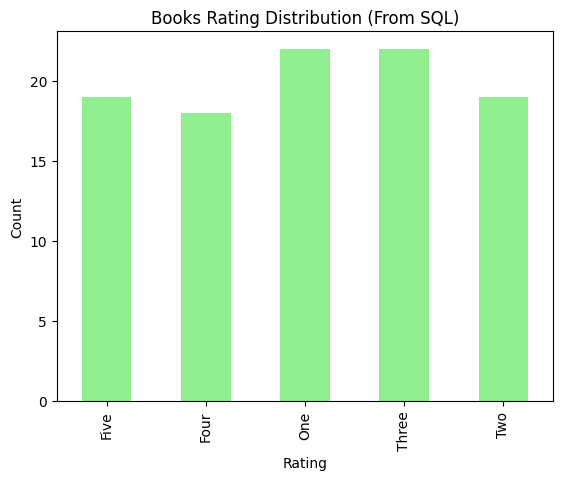

In [43]:
import matplotlib.pyplot as plt

df_sql['Rating'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title("Books Rating Distribution (From SQL)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


<Axes: xlabel='Availability', ylabel='count'>

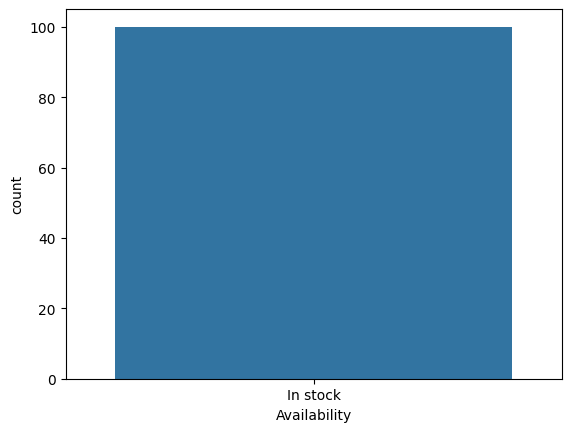

In [7]:
sns.countplot(data=df, x="Availability")


C:\Users\puchu\AppData\Local\Temp\ipykernel_20052\599038407.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_rating, x="Rating", y="Price", palette="pastel")


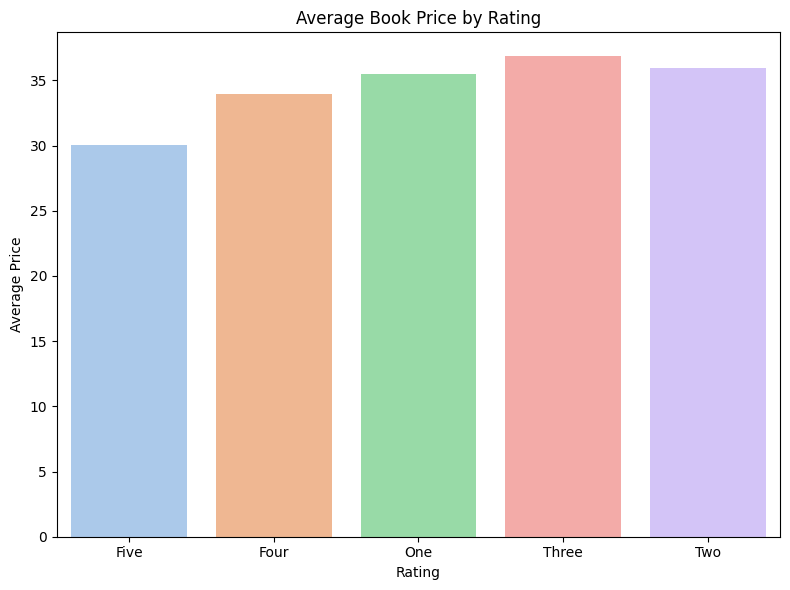

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data
avg_price_by_rating = df.groupby("Rating")["Price"].mean().reset_index()

# Plot using Seaborn with pastel palette
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_price_by_rating, x="Rating", y="Price", palette="pastel")

plt.title("Average Book Price by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()


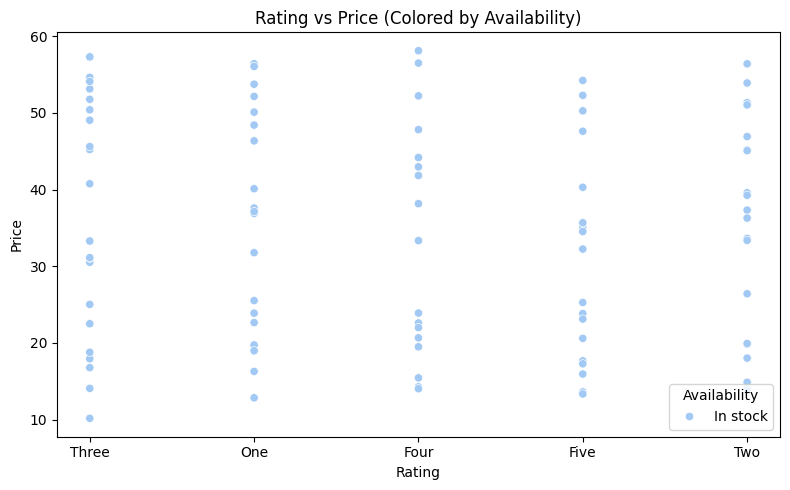

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Rating", y="Price", hue="Availability", palette="pastel")
plt.title("Rating vs Price (Colored by Availability)")
plt.tight_layout()
plt.show()


In [13]:
import plotly.express as px

top_expensive = df.sort_values(by="Price", ascending=False).head(10)

fig = px.bar(
    top_expensive,
    x="Price",
    y="Title",
    orientation='h',
    color="Price",
    color_continuous_scale='Peach',
    title="Top 10 Most Expensive Books"
)

fig.update_layout(yaxis=dict(autorange="reversed"))  # So highest price on top
fig.show()


In [14]:
avg_price = df.groupby("Rating")["Price"].mean().reset_index()

fig = px.bar(
    avg_price,
    x="Rating",
    y="Price",
    color="Price",
    title="Average Book Price by Rating",
    color_continuous_scale="Mint"
)
fig.show()


In [20]:
# Prepare Rating Data
rating_counts = df['Rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

# Pie Chart (Rating Distribution)
fig = px.pie(
    rating_counts,
    names='Rating',
    values='Count',
    title='Book Rating Distribution',
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.show()


In [21]:
fig = px.box(df, x='Availability', y='Rating',
             title='Rating Distribution by Availability',
             color='Availability',
             color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()


In [22]:
fig = px.histogram(df, x='Price', nbins=20,
                   title='Distribution of Book Prices',
                   color_discrete_sequence=['#FFB6C1'])
fig.show()
